# A DATA ANALYSIS OF TRAFFIC ACCIDENTS IN SEATTLE, WA
### Applied Data Science Capstone for the IBM Data Science Profissional Certificate/Coursera

Author: Marcelo Camera Oliveira


## Table of contents
* [1 - Business Understanding](#intro)
* [2 - The Data](#data)
    * [2.1 - Data Summary](#data-summary)
    * [2.2 - Data Download](#data-download)
    * [2.3 - Attribute Information](#data-attribute)
* [3 - Methodology](#methodology)
    * [3.1 - Data Acquisition](#data-acquisition)
    * [3.2 - Understanding the Data](#data-understanding)
    * [3.3 - Preliminary Data Preparation](#data-preliminary)
    * [3.4 - Exploratory Data Analysis](#data-eda)
    * [3.5 - Feature Selection](#feature-selection)
    * [3.6 - Data Cleaning](#data-cleaning)
* [4 - Analysis](#analysis)
* [5 - Results and Discussion](#results)
* [6 - Conclusion](#final)

## 1. Business Understanding  <a name="intro"></a>

The increasing number of cars on the roads brings with it a worrying reality: the increase of the accident rate. Such accidents cause enormous consequences, the most important of which, of a human nature, is the loss of life. Other effects appear in the ride of this reality, one of which is the financial loss, due to the long traffic jams and roadblocks, which have a negative impact on the logistics of goods.

In parallel, it is necessary to contextualize the importance of Information and Communication Technology (ICT) in solving urban problems. Given the worldwide technological advancement, cities are becoming increasingly “smart”. The terminology "Smart Cities" basically goes back to the concept of a city that makes use of ICT, through various physical devices connected to the IoT (Internet of Things) network, in order to optimize its operations and services, in addition to connecting citizens.

Faced with such a problem, it is suggested the development of a mathematical model that, in view of the knowledge of initial situations, a risk classification should be carried out. From this perspective, given the driver's entry into a certain road, he is given knowledge of the degree of risk to which he will be subject and, thus, the necessary preventive measures can be taken, such as: changing his route, reducing the car speed, or increasing your attention.

Thus, having the knowledge of historical accident data in a given location and the creation of a mathematical model based on this data, a city could use this tool to implement data capture devices (rain, traffic, object recognition on the roads) with the purpose of issuing alerts to the drivers (electronic boards, mobile phone applications, among others).

### 1.1 The Stakehoders

This project aims to inform Seattle city drivers (audience) about the conditions of the road he will be joining. In this way, he will be able to analyze the situation in order to take the necessary preventive measures.

## 2. The Data <a name="data"></a>

We will use the data of the City of Seattle Open Data Portal ([https://data.seattle.gov/](https://data.seattle.gov/)). This data contains several records of traffic accidents in the city of Seattle, USA, from 2004 to the present.

### 2.1 Data Sumary  <a name="data-summary"></a>

|   |   |
| :---: | :---: |
| **Title** | Collisions — All Years |
| **Abstract** | All collisions provided by SPD and recorded by Traffic Records. |
| **Description** | This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present. |
|**Update Frequency** | Weekly |
| **Keyword(s)** | SDOT, Seattle, Transportation, Accidents, Bicycle, Car, Collisions, Pedestrian, Traffic, Vehicle |
| **Contact Organization** | SDOT Traffic Management Division, Traffic Records Group |
| **Contact** | Person SDOT GIS Analyst |
| **Contact** | Email DOT_IT_GIS@seattle.gov |

### 2.2 Dataset Download  <a name="data-download"></a>

The dataset could be downloaded at: [https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions)  

### 2.3 Attribute Information  <a name="data-attribute"></a>

The complete attribute information for this data source can be found via [this link.](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)  
Analyzing the available data dictionary, with focus on the problem, we could see wich features we will really necessary. These were the chosen ones:

| ATTRIBUTE | DESCRIPTION |
| :---: | :---: |
| `OBJECTID` | unique record identifier; |
| `X` | Longitude - Geographic coordinate; |
| `Y` | Latitude - Geographic coordinate; |
| `ADDRTYPE` | Collision address type: Alley, Block or Intersection; |
| `LOCATION` | Description of the general location of the collision; |
| `SEVERITYCODE` | Target variable. Severity of the collision (3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown); |
| `SEVERITYDESC` | A detailed description of the severity of the collision |
| `COLLISIONTYPE` | Collision type; |
| `INJURIES` | The number of total injuries in the collision; |
| `SERIOUSINJURIES` | The number of serious injuries in the collision; |
| `FATALITIES` | The number of fatalities in the collision; |
| `INCDTTM` | The date and time of the incident; |
| `JUNCTIONTYPE` | Category of junction at which collision took place; |
| `INATTENTIONIND` | Whether or not collision was due to inattention; |
| `UNDERINFL` | Whether or not a driver involved was under the influence of drugs or alcohol; |
| `WEATHER` | A description of the weather conditions during the time of the collision; |
| `ROADCOND` | The condition of the road during the collision; |
| `LIGHTCOND` | The light conditions during the collision; |
| `SPEEDING` | Whether or not speeding was a factor in the collision; |
| `HITPARKEDCAR` | Whether or not the collision involved hitting a parked car. |

The target variable will be the "SEVERITYCODE", which indicates the severity of the accident.

## 3. Methodology <a name="methodology"></a>

This is the main section of the project. Here, we will cover and describe the exploratory data analysis, inferential statistical testing and what machine learnings were used and why.

### 3.1 Data Acquisition <a name="data-acquisition"></a>

Let's import and load the data to a dataframe, with the attributes already chosen.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Downloading the data
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

In [2]:
#Loading the data
print('Loading data...')
chosen_attributes = ['OBJECTID','X','Y','ADDRTYPE','LOCATION','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE',
                     'INJURIES','SERIOUSINJURIES','FATALITIES','INCDTTM','JUNCTIONTYPE','INATTENTIONIND',
                     'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']
collisions_raw = pd.read_csv('collisions.csv', low_memory=False, usecols=chosen_attributes, parse_dates=['INCDTTM']) #loading the data with the features chosen and formating the 'INCDTTM' attribute to a date format.
print('Data loaded!')

Loading data...
Data loaded!


### 3.2 Understanding the Data  <a name="data-understanding"></a>

In [3]:
#Taking a look into the dataframe
collisions_raw.head()

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,-122.315658,47.675815,1,Intersection,12TH AVE NE AND NE 65TH ST,2,Injury Collision,Pedestrian,1,0,0,2020-03-09 11:34:00,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,N
1,-122.316780,47.608643,2,Block,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,1,Property Damage Only Collision,Sideswipe,0,0,0,2013-03-27 14:02:00,Mid-Block (not related to intersection),NaN,N,Raining,Wet,Daylight,NaN,N
2,-122.344569,47.694547,3,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Injury Collision,Rear Ended,1,0,0,2013-03-29 14:47:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,N
3,-122.365999,47.691729,4,Block,8TH AVE NW BETWEEN NW 86TH ST AND NW 87TH ST,0,Unknown,NaN,0,0,0,2019-08-10 00:00:00,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Y
4,NaN,NaN,5,Block,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,1,Property Damage Only Collision,Other,0,0,0,2004-12-23 00:20:00,Mid-Block (not related to intersection),NaN,1,Clear,Dry,Dark - Street Lights On,NaN,N


In [4]:
collisions_raw.describe()

,X,Y,OBJECTID,INJURIES,SERIOUSINJURIES,FATALITIES
count,215093.000000,215093.000000,222581.000000,222581.000000,222581.000000,222581.000000
mean,-122.330753,47.620179,111291.000000,0.373918,0.015235,0.001716
std,0.030063,0.056079,64253.744471,0.731863,0.158012,0.045031
min,-122.425315,47.495573,1.000000,0.000000,0.000000,0.000000
25%,-122.349280,47.576979,55646.000000,0.000000,0.000000,0.000000
50%,-122.330372,47.616033,111291.000000,0.000000,0.000000,0.000000
75%,-122.311998,47.664291,166936.000000,1.000000,0.000000,0.000000
max,-122.238949,47.734142,222581.000000,78.000000,41.000000,5.000000


In [5]:
collisions_raw.info()
print("\n The dataset has", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222581 entries, 0 to 222580
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X                215093 non-null  float64       
 1   Y                215093 non-null  float64       
 2   OBJECTID         222581 non-null  int64         
 3   ADDRTYPE         218858 non-null  object        
 4   LOCATION         217979 non-null  object        
 5   SEVERITYCODE     222580 non-null  object        
 6   SEVERITYDESC     222581 non-null  object        
 7   COLLISIONTYPE    195981 non-null  object        
 8   INJURIES         222581 non-null  int64         
 9   SERIOUSINJURIES  222581 non-null  int64         
 10  FATALITIES       222581 non-null  int64         
 11  INCDTTM          222581 non-null  datetime64[ns]
 12  JUNCTIONTYPE     210579 non-null  object        
 13  INATTENTIONIND   30195 non-null   object        
 14  UNDERINFL        196

### 3.3 Preliminary data preparation <a name="data-preliminary"></a>

In [6]:
#Checking if there are any missing values
collisions_raw.isna().sum().to_frame()

,0
X,7488
Y,7488
OBJECTID,0
ADDRTYPE,3723
LOCATION,4602
SEVERITYCODE,1
SEVERITYDESC,0
COLLISIONTYPE,26600
INJURIES,0
SERIOUSINJURIES,0


The attributes "INATTENTIONIND" and "SPEEDING" attracts our attention. There are just a few registers of them: 9,982 registers for the "SPEEDING" attribute and 30,195 for the "INATTENTIONIND" atrribute. This amounts to of 4.5% and 13.5% of the data, respectively. Because of these few quantity of records, we choose to delete them.  

The others attributes has just a few missing data, so we will treat them later.

In [7]:
collisions_raw.drop(columns=['SPEEDING','INATTENTIONIND'], inplace=True) #dropping the attributes
print("\n The dataset has now", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")


 The dataset has now 222581 records and 18 collumns (target variable and attributes).


In [8]:
#Checking the unique values of some attributes just to see if we have something wrong.
for i in collisions_raw.columns:
    print(i, collisions_raw[i].unique(),'\n')

X [-122.31565805 -122.31677994 -122.34456926 ... -122.3392689  -122.28595855
 -122.35335875] 

Y [47.67581493 47.60864269 47.6945466  ... 47.66708309 47.71189454
 47.67604535] 

OBJECTID [     1      2      3 ... 222579 222580 222581] 

ADDRTYPE ['Intersection' 'Block' 'Alley' nan] 

LOCATION ['12TH AVE NE AND NE 65TH ST'
 '12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST'
 'AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST' ...
 'NE 115TH ST BETWEEN 39TH AVE NE AND 40TH AVE NE'
 'FRANCIS AVE N AND N 65TH ST' '42ND AVE S AND DEAD END 1'] 

SEVERITYCODE ['2' '1' '0' '2b' '3' nan] 

SEVERITYDESC ['Injury Collision' 'Property Damage Only Collision' 'Unknown'
 'Serious Injury Collision' 'Fatality Collision'] 

COLLISIONTYPE ['Pedestrian' 'Sideswipe' 'Rear Ended' nan 'Other' 'Parked Car'
 'Left Turn' 'Head On' 'Angles' 'Right Turn' 'Cycles'] 

INJURIES [ 1  0  2  3  4  5  6  7  8 11  9 10 13 12 15 78] 

SERIOUSINJURIES [ 0  1  2  3  5  4 41] 

FATALITIES [0 2 1 4 3 5] 

INCDTTM ['2020-03-09T11:34:

Now, it's importanting to correct the data of the "UNDERINFL" attribute. Let's transforming all the zero values to "N" and all of the ones values to "Y".

In [9]:
collisions_raw['UNDERINFL'].replace("0","N",inplace=True)
collisions_raw['UNDERINFL'].replace("1","Y",inplace=True)
collisions_raw['UNDERINFL'].unique()

array(['N', nan, 'Y'], dtype=object)

To expand our analysis, we will add columns for ther years and the months.

In [10]:
collisions_raw['YEAR']=collisions_raw['INCDTTM'].dt.year
collisions_raw['MONTH']=collisions_raw['INCDTTM'].dt.month
collisions_raw[['INCDTTM','MONTH','YEAR']].head(10)

,INCDTTM,MONTH,YEAR
0,2020-03-09 11:34:00,3,2020
1,2013-03-27 14:02:00,3,2013
2,2013-03-29 14:47:00,3,2013
3,2019-08-10 00:00:00,8,2019
4,2004-12-23 00:20:00,12,2004
5,2006-02-21 00:13:00,2,2006
6,2005-05-27 06:00:00,5,2005
7,2013-03-25 02:27:00,3,2013
8,2013-03-30 20:47:00,3,2013
9,2007-10-09 00:00:00,10,2007


Let's see how the data is distributed over time.

In [11]:
df_collisions_yr = collisions_raw[['YEAR','OBJECTID']].groupby(by=['YEAR']).count()
df_collisions_yr = df_collisions_yr.rename(columns={'OBJECTID': 'TOTAL_RECORDS'})
df_collisions_yr

,TOTAL_RECORDS
YEAR,
2003,1
2004,15457
2005,16016
2006,15794
2007,15082
2008,14139
2009,13275
2010,11958
2011,12417


There is only one record for the 2003 year. So we can delete this information.

In [12]:
collisions_raw.query('YEAR == "2003"')

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,YEAR,MONTH
802,-122.320755,47.608073,803,Intersection,BROADWAY AND CHERRY ST,0,Unknown,NaN,0,0,0,2003-10-06,NaN,NaN,NaN,NaN,NaN,N,2003,10


In [13]:
collisions_raw = collisions_raw.query('YEAR != "2003"')
df_collisions_yr = df_collisions_yr.query('YEAR != "2003"')
print('Record deleted!')

Record deleted!


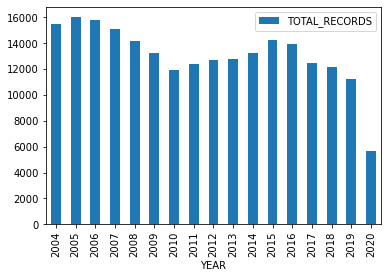

In [14]:
df_collisions_yr.plot(kind='bar')
plt.show()

In [15]:
print('Our first record is on:', collisions_raw['INCDTTM'].dt.date.min())
print('Our last record is on:', collisions_raw['INCDTTM'].dt.date.max())

Our first record is on: 2004-01-01
Our last record is on: 2020-11-04


That's the dataframe after the adjustments.

In [16]:
collisions_raw.head()

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,YEAR,MONTH
0,-122.315658,47.675815,1,Intersection,12TH AVE NE AND NE 65TH ST,2,Injury Collision,Pedestrian,1,0,0,2020-03-09 11:34:00,At Intersection (intersection related),N,Clear,Dry,Daylight,N,2020,3
1,-122.316780,47.608643,2,Block,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,1,Property Damage Only Collision,Sideswipe,0,0,0,2013-03-27 14:02:00,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,N,2013,3
2,-122.344569,47.694547,3,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Injury Collision,Rear Ended,1,0,0,2013-03-29 14:47:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,2013,3
3,-122.365999,47.691729,4,Block,8TH AVE NW BETWEEN NW 86TH ST AND NW 87TH ST,0,Unknown,NaN,0,0,0,2019-08-10 00:00:00,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,Y,2019,8
4,NaN,NaN,5,Block,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,1,Property Damage Only Collision,Other,0,0,0,2004-12-23 00:20:00,Mid-Block (not related to intersection),Y,Clear,Dry,Dark - Street Lights On,N,2004,12


In [17]:
collisions_raw.describe()

,X,Y,OBJECTID,INJURIES,SERIOUSINJURIES,FATALITIES,YEAR,MONTH
count,215092.000000,215092.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000,222580.000000
mean,-122.330753,47.620179,111291.496397,0.373919,0.015235,0.001716,2011.363379,6.571619
std,0.030063,0.056080,64253.462014,0.731864,0.158012,0.045031,4.793374,3.421777
min,-122.425315,47.495573,1.000000,0.000000,0.000000,0.000000,2004.000000,1.000000
25%,-122.349280,47.576979,55646.750000,0.000000,0.000000,0.000000,2007.000000,4.000000
50%,-122.330375,47.616033,111291.500000,0.000000,0.000000,0.000000,2011.000000,7.000000
75%,-122.311998,47.664291,166936.250000,1.000000,0.000000,0.000000,2015.000000,10.000000
max,-122.238949,47.734142,222581.000000,78.000000,41.000000,5.000000,2020.000000,12.000000


In [18]:
collisions_raw.info()
print("\n The dataset has", collisions_raw.shape[0],"records and", collisions_raw.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222580 entries, 0 to 222580
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X                215092 non-null  float64       
 1   Y                215092 non-null  float64       
 2   OBJECTID         222580 non-null  int64         
 3   ADDRTYPE         218857 non-null  object        
 4   LOCATION         217978 non-null  object        
 5   SEVERITYCODE     222579 non-null  object        
 6   SEVERITYDESC     222580 non-null  object        
 7   COLLISIONTYPE    195981 non-null  object        
 8   INJURIES         222580 non-null  int64         
 9   SERIOUSINJURIES  222580 non-null  int64         
 10  FATALITIES       222580 non-null  int64         
 11  INCDTTM          222580 non-null  datetime64[ns]
 12  JUNCTIONTYPE     210579 non-null  object        
 13  UNDERINFL        196001 non-null  object        
 14  WEATHER          195

### 3.4 Exploratory Data Analysis <a name="data-eda"></a>

#### Attribute SEVERITYDESC:

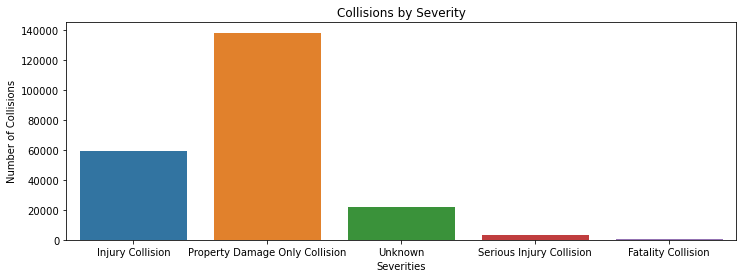

,SEVERITYDESC
Property Damage Only Collision,138252
Injury Collision,59058
Unknown,21781
Serious Injury Collision,3131
Fatality Collision,358


In [19]:
fig_severity = plt.gcf()
fig_severity.set_size_inches(12, 4)
sns.countplot(x='SEVERITYDESC', data=collisions_raw)
plt.title('Collisions by Severity')
plt.ylabel('Number of Collisions')
plt.xlabel('Severities')
plt.savefig('eda_severitydesc.eps', format='eps', dpi=300)
plt.show()
collisions_raw['SEVERITYDESC'].value_counts().to_frame()

- The attribute SEVERITYDESC is our target variable. It will be important when we are modeling our machine learning algorithm. He tells us how serious an accident was;
- The attribute SEVERITYDESC is the same as SEVERITYCODE. The difference is that the SEVERITYCODE contains the records in numerical values;
- The vast majority of recorded accidents are damage to property. Second, with more than twice as many records as first place, there are injuries accidents;
- There are a significant number of accidents with unidentified severity. We will have to decide what to do with these records during the data preparation stage to create the machine learning model;
- Finally, there are accidents with few records, which are those with serious severity and fatal accidents.

#### Attribute ADDRTYPE:

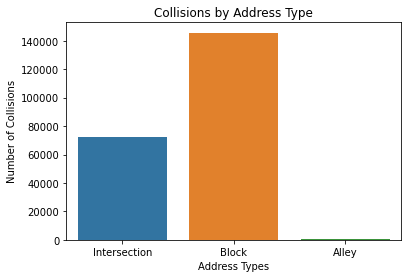

,ADDRTYPE
Block,145679
Intersection,72299
Alley,879


In [20]:
sns.countplot(x='ADDRTYPE', data=collisions_raw)
plt.title('Collisions by Address Type')
plt.ylabel('Number of Collisions')
plt.xlabel('Address Types')
plt.savefig('eda_addrtype.eps', format='eps', dpi=300)
plt.show()
collisions_raw['ADDRTYPE'].value_counts().to_frame()

There are twice as many accidents at the Blocks as at the intersections. There are very few accident records at Alleys

#### Attribute COLLISIONTYPE:

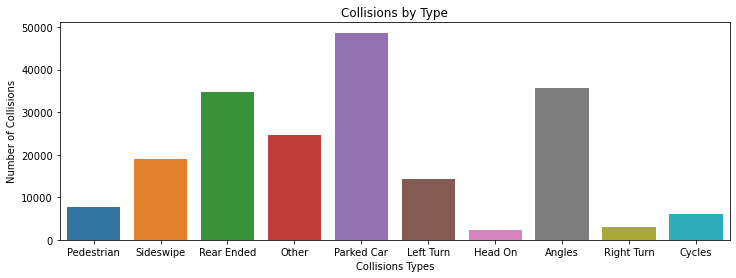

,COLLISIONTYPE
Parked Car,48673
Angles,35759
Rear Ended,34825
Other,24699
Sideswipe,18962
Left Turn,14173
Pedestrian,7698
Cycles,5958
Right Turn,3029
Head On,2205


In [21]:
fig_coltype = plt.gcf()
fig_coltype.set_size_inches(12, 4)
sns.countplot(x='COLLISIONTYPE', data=collisions_raw)
plt.title('Collisions by Type')
plt.ylabel('Number of Collisions')
plt.xlabel('Collisions Types')
plt.savefig('eda_collisiontype.eps', format='eps', dpi=300)
plt.show()
collisions_raw['COLLISIONTYPE'].value_counts().to_frame()

- Collisions with parked cars are the most common;
- Secondly, accidents at the rear end and at angles are tied;
- Approximately 25,000 records have not been categorized. They are responsible for the fourth most common type of collision. We will discuss later what to do with this missing data.

#### Attribute JUNCTIONTYPE:

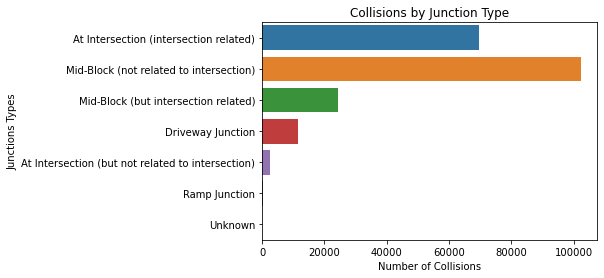

,JUNCTIONTYPE
Mid-Block (not related to intersection),102327
At Intersection (intersection related),69588
Mid-Block (but intersection related),24453
Driveway Junction,11499
At Intersection (but not related to intersection),2501
Ramp Junction,190
Unknown,21


In [22]:
sns.countplot(y='JUNCTIONTYPE', data=collisions_raw)
plt.title('Collisions by Junction Type')
plt.xlabel('Number of Collisions')
plt.ylabel('Junctions Types')
plt.savefig('eda_junctiontype.eps', format='eps', dpi=300)
plt.show()
collisions_raw['JUNCTIONTYPE'].value_counts().to_frame()

The analysis of this attribute seems to confirm the previous analysis on accidents by type of address. Accidents at intersections and blocks are the most evident.

#### Attribute UNDERINFLD:

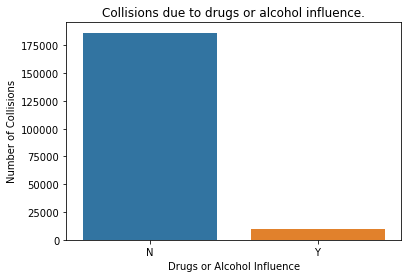

,UNDERINFL
N,186372
Y,9629


In [23]:
sns.countplot(x='UNDERINFL', data=collisions_raw)
plt.title('Collisions due to drugs or alcohol influence.')
plt.ylabel('Number of Collisions')
plt.xlabel('Drugs or Alcohol Influence')
plt.savefig('eda_underinfluence.eps', format='eps', dpi=300)
plt.show()
collisions_raw['UNDERINFL'].value_counts().to_frame()

It is clear that the influence of drugs or alcohol beverages is not the main cause of accidents.

#### Attribute WEATHER:

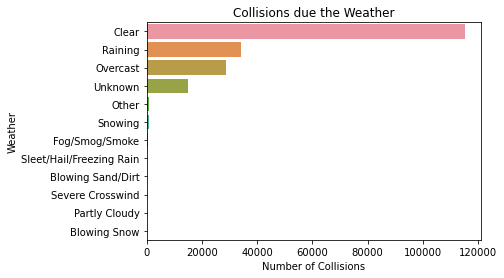

,WEATHER
Clear,115305
Raining,34096
Overcast,28640
Unknown,15131
Snowing,919
Other,867
Fog/Smog/Smoke,623
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [24]:
sns.countplot(y='WEATHER', data=collisions_raw)
plt.title('Collisions due the Weather')
plt.xlabel('Number of Collisions')
plt.ylabel('Weather')
plt.savefig('eda_weather.eps', format='eps', dpi=300)
plt.show()
collisions_raw['WEATHER'].value_counts().to_frame()

- The great majority of accidents occur in clean weather;
- The second factor is in rainy times, but it is still at least three times less frequent than in clean times;
- The other types of weather have just a few records.

#### Attribute ROADCOND:

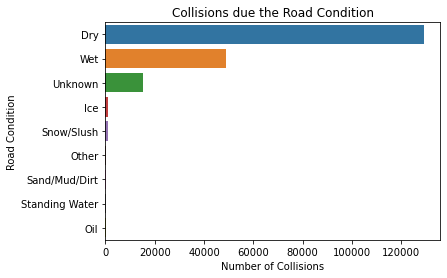

,ROADCOND
Dry,129251
Wet,48828
Unknown,15149
Ice,1233
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [25]:
sns.countplot(y='ROADCOND', data=collisions_raw)
plt.title('Collisions due the Road Condition')
plt.xlabel('Number of Collisions')
plt.ylabel('Road Condition')
plt.savefig('eda_roadcond.eps', format='eps', dpi=300)
plt.show()
collisions_raw['ROADCOND'].value_counts().to_frame()

- The great majority of accidents occur in dry roads;
- The second factor is in wet roads, but it is still at least twice less frequent than in dry roads;
- The other types of road conditions have just a few records.

#### Attribute LIGHTCOND:

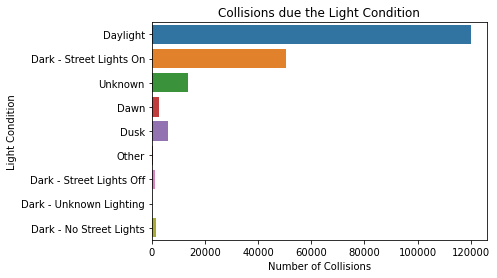

,LIGHTCOND
Daylight,120015
Dark - Street Lights On,50321
Unknown,13539
Dusk,6113
Dawn,2616
Dark - No Street Lights,1581
Dark - Street Lights Off,1240
Other,245
Dark - Unknown Lighting,31


In [26]:
sns.countplot(y='LIGHTCOND', data=collisions_raw)
plt.title('Collisions due the Light Condition')
plt.xlabel('Number of Collisions')
plt.ylabel('Light Condition')
plt.savefig('eda_lightcond.eps', format='eps', dpi=300)
plt.show()
collisions_raw['LIGHTCOND'].value_counts().to_frame()

- The great majority of accidents occur on daylight;
- The second factor is on dark, with street lights, but it is still at least twice less frequent than on daylights;
- The other types of light conditions have just a few records.

#### Attribute HITPARKEDCAR:

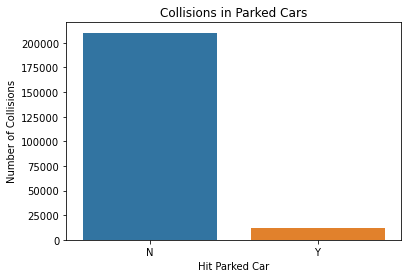

,HITPARKEDCAR
N,210285
Y,12295


In [27]:
sns.countplot(x='HITPARKEDCAR', data=collisions_raw)
plt.title('Collisions in Parked Cars')
plt.ylabel('Number of Collisions')
plt.xlabel('Hit Parked Car')
plt.savefig('eda_hitparkedcar.eps', format='eps', dpi=300)
plt.show()
collisions_raw['HITPARKEDCAR'].value_counts().to_frame()

- The great majority of accidents did not involve parked cars.

#### Attribute INJURIES

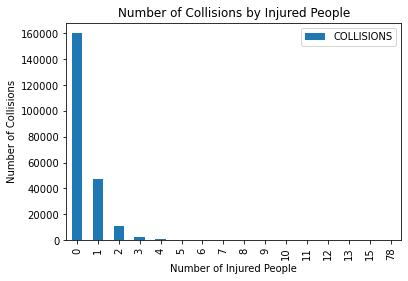

,COLLISIONS
INJURIES,
0,160273
1,47554
2,10737
3,2740
4,823
5,275
6,100
7,40
8,12


In [28]:
df_injuries = pd.DataFrame(collisions_raw[['OBJECTID','INJURIES']].values,columns=['COLLISIONS', 'INJURIES'])
df_injuries.groupby(by=['INJURIES']).count().plot.bar()
plt.title('Number of Collisions by Injured People')
plt.xlabel('Number of Injured People')
plt.ylabel('Number of Collisions')
plt.show()
df_injuries.groupby(by=['INJURIES']).count()

- The great majority of accidents had no injuries;
- At first, it seems that we have an outlier. There is a record of 78 wounds. Maybe it's an error in the accident record? We will get more data to investigate this.

In [29]:
collisions_raw.query('INJURIES == "78"')

,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,YEAR,MONTH
165227,-122.347294,47.647172,165228,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,3,Fatality Collision,Head On,78,41,5,2015-09-24 11:11:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,2015,9


After researching in the Internet about the address and date of the accident, we found that there was really a major accident involving a school bus, an amphibious tour vehicle and several passenger vehicles!  

Link: [Fatal Multi Casualty Incident on Aurora Bridge](https://spdblotter.seattle.gov/2015/09/24/fatal-multi-casualty-incident-on-aurora-bridge/)

#### Attribute SERIOUSINJURIES

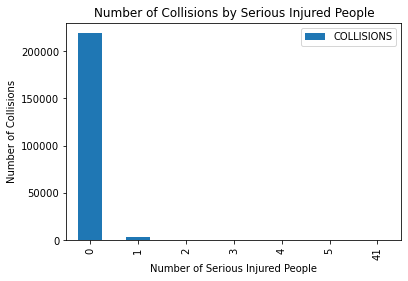

,COLLISIONS
SERIOUS_INJURIES,
0,219447
1,2964
2,134
3,23
4,6
5,5
41,1


In [30]:
df_seriousinjuries = pd.DataFrame(collisions_raw[['OBJECTID','SERIOUSINJURIES']].values,columns=['COLLISIONS', 'SERIOUS_INJURIES'])
df_seriousinjuries.groupby(by=['SERIOUS_INJURIES']).count().plot.bar()
plt.title('Number of Collisions by Serious Injured People')
plt.xlabel('Number of Serious Injured People')
plt.ylabel('Number of Collisions')
plt.show()
df_seriousinjuries.groupby(by=['SERIOUS_INJURIES']).count()

- The great majority of accidents had no serious injuries;
- The record with 41 serious injuries is that what we had talked before.

#### Attribute FATALITIES

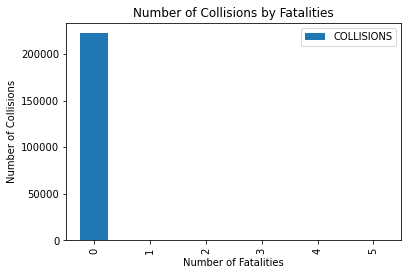

,COLLISIONS
FATALITIES,
0,222222
1,341
2,13
3,2
4,1
5,1


In [31]:
df_fatalities = pd.DataFrame(collisions_raw[['OBJECTID','FATALITIES']].values,columns=['COLLISIONS', 'FATALITIES'])
df_fatalities.groupby(by=['FATALITIES']).count().plot.bar()
plt.title('Number of Collisions by Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Collisions')
plt.show()
df_fatalities.groupby(by=['FATALITIES']).count()

- The great majority of accidents had no fatalities.

#### Attribute INCDTTM (time)

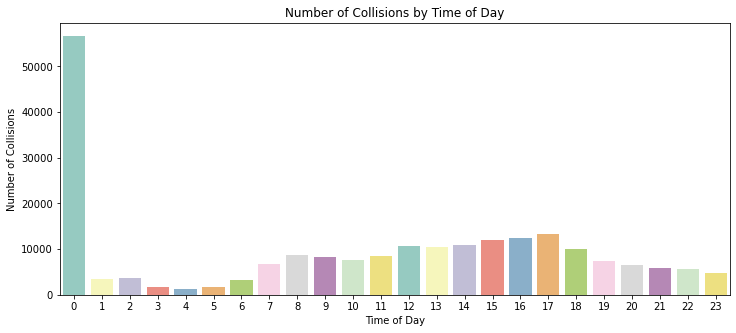

In [32]:
df_hour = pd.DataFrame(collisions_raw['INCDTTM'].values,columns=['COLLISIONS'])
df_hour['HOUR'] = df_hour['COLLISIONS'].dt.hour
plt.figure(figsize=(12, 5))
sns.countplot(x='HOUR',data=df_hour,palette='Set3')
plt.title('Number of Collisions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Collisions')
plt.show()

It looks like we have a problem with the accident records at midnight. The value is expressly high and does not follow, even closely, the pattern of the nearest times. For now, let's exclude this time from our chart.

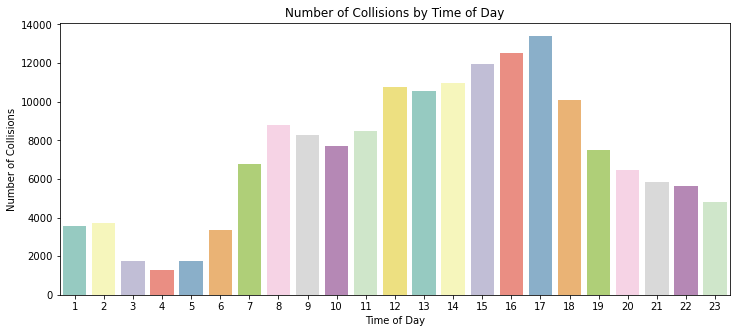

,COLLISIONS
HOUR,
1,3560
2,3740
3,1748
4,1285
5,1737
6,3348
7,6771
8,8817
9,8288


In [33]:
plt.figure(figsize=(12, 5))
sns.countplot(x='HOUR',data=df_hour.query('HOUR != "0"'),palette='Set3')
plt.title('Number of Collisions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Collisions')
plt.show()
df_hour.query('HOUR != "0"').groupby(by=['HOUR']).count()

- Less accidents happen during the night between 1 and 5 am;
- At 6 am, the number of accidents starts to increase, peaking at 5 pm, when it starts to decrease.

#### Attribute INCDTTM (weekday)

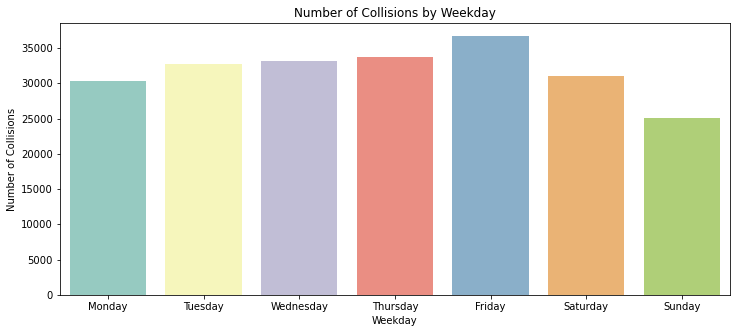

,COLLISIONS
WEEKDAY,
Friday,36710
Monday,30266
Saturday,31039
Sunday,25034
Thursday,33740
Tuesday,32689
Wednesday,33102


In [34]:
df_weekday = pd.DataFrame(collisions_raw['INCDTTM'].values,columns=['COLLISIONS'])
df_weekday['WEEKDAY'] = df_weekday['COLLISIONS'].dt.weekday
week_map = {'0':'Monday', '1':'Tuesday', '2':'Wednesday', '3':'Thursday', '4':'Friday', '5':'Saturday', '6':'Sunday'}
df_weekday['WEEKDAY'] = df_weekday['WEEKDAY'].astype(str).map(week_map)
plt.figure(figsize=(12, 5))
sns.countplot(x='WEEKDAY',data=df_weekday,palette='Set3', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of Collisions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Collisions')
plt.show()
df_weekday.groupby(by=['WEEKDAY']).count()

- The number of accidents per weekday is very close;
- There seems to be a small increase on Fridays;
- Sunday is the day with the least amount of accidents reported.

#### Attribute LOCATION

In [35]:
df_location = collisions_raw['LOCATION'].value_counts().to_frame('COLLISIONS')
df_location.head(10)

,COLLISIONS
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,297
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,283
6TH AVE AND JAMES ST,277
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,273
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,260
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,256
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,230
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,225


- These are the 10 places that most accidents occurred.

### 3.5 Feature Selection <a name="feature-selection"></a>

As the focus of our project is to create a mathematical model in which the input variables can be obtained through electronic mechanisms (devices), we will reduce the number of attributes.

We have identified the following attributes as possible for use.

In [78]:
#Chosen attributes:
collisions = collisions_raw[['ADDRTYPE','LOCATION','SEVERITYCODE','COLLISIONTYPE',
                             'JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
print(collisions.columns)
collisions.head()

Index(['ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'COLLISIONTYPE', 'JUNCTIONTYPE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')


,ADDRTYPE,LOCATION,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,Intersection,12TH AVE NE AND NE 65TH ST,2,Pedestrian,At Intersection (intersection related),Clear,Dry,Daylight
1,Block,12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST,1,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Daylight
2,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Rear Ended,Mid-Block (not related to intersection),Clear,Dry,Daylight
3,Block,8TH AVE NW BETWEEN NW 86TH ST AND NW 87TH ST,0,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN
4,Block,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,1,Other,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On


### 3.6 Data Cleaning <a name="data-cleaning"></a>

In [80]:
#Checking columns types and data shape
collisions.info()
print("\n The dataset has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222580 entries, 0 to 222580
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       218857 non-null  object
 1   LOCATION       217978 non-null  object
 2   SEVERITYCODE   222579 non-null  object
 3   COLLISIONTYPE  195981 non-null  object
 4   JUNCTIONTYPE   210579 non-null  object
 5   WEATHER        195790 non-null  object
 6   ROADCOND       195871 non-null  object
 7   LIGHTCOND      195701 non-null  object
dtypes: object(8)
memory usage: 25.3+ MB

 The dataset has 222580 records and 8 collumns (target variable and attributes).


In [81]:
#Checking how many missing values are there
collisions.isna().sum().to_frame()

,0
ADDRTYPE,3723
LOCATION,4602
SEVERITYCODE,1
COLLISIONTYPE,26599
JUNCTIONTYPE,12001
WEATHER,26790
ROADCOND,26709
LIGHTCOND,26879


In [82]:
collisions.dropna(inplace=True) #Deleting records with missing data

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [83]:
#Checking the unique values of some attributes just to see if we have something wrong.
for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

ADDRTYPE ['Intersection' 'Block'] 

LOCATION ['12TH AVE NE AND NE 65TH ST'
 '12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST'
 'AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST' ...
 '2ND AVE NW AND NW 48TH ST'
 'COVELLO DR S BETWEEN SWIFT W AVE S AND SWIFT E AVE S'
 '42ND AVE S AND DEAD END 1'] 

SEVERITYCODE ['2' '1' '2b' '3' '0'] 

COLLISIONTYPE ['Pedestrian' 'Sideswipe' 'Rear Ended' 'Other' 'Parked Car' 'Left Turn'
 'Head On' 'Angles' 'Right Turn' 'Cycles'] 

JUNCTIONTYPE ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)' 'Driveway Junction'
 'At Intersection (but not related to intersection)' 'Ramp Junction'
 'Unknown'] 

WEATHER ['Clear' 'Raining' 'Overcast' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy'] 

ROADCOND ['Dry' 'Wet' 'Unknown' 'Ice' 'Snow/Slush' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil'] 

LIGHTCOND ['Daylight' 'D

In [84]:
collisions['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,117540
Dark - Street Lights On,49287
Unknown,10475
Dusk,5976
Dawn,2563
Dark - No Street Lights,1488
Dark - Street Lights Off,1195
Other,219
Dark - Unknown Lighting,31


In [89]:
#Some attributes have values like "Unknown" or "Other" that do not help us. We will delete records that contain these values.
collisions = collisions.drop(collisions[(collisions['COLLISIONTYPE'] == "Other") | 
                                        (collisions['JUNCTIONTYPE'] == "Unknown") | 
                                        (collisions['WEATHER'] == "Other") | 
                                        (collisions['WEATHER'] == "Unknown") |
                                        (collisions['ROADCOND'] == "Other") | 
                                        (collisions['ROADCOND'] == "Unknown") |
                                        (collisions['LIGHTCOND'] == "Other") |
                                        (collisions['LIGHTCOND'] == "Unknown")
                                       ].index)

#Fixing the attribute UNDERINFL for use only zeros and ones.

#collisions['UNDERINFL'].replace("N","0",inplace=True)
#collisions['UNDERINFL'].replace("Y","1",inplace=True)
#collisions['UNDERINFL'] = collisions['UNDERINFL'].astype('int') #changing the attribute type for integer

#The information bellow is the same. Let's join then.
collisions['LIGHTCOND'] = collisions['LIGHTCOND'].replace("Dark - Street Lights Off", "Dark - No Street Lights")

#Dropping the 'Dark - Unknown Lighting' in attribute 'LIGHTCOND'. There are only a few records and this information doesnt help so much.
collisions = collisions.drop(collisions[(collisions['LIGHTCOND'] == "Dark - Unknown Lighting")].index)

for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

print("\n The dataset now has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

ADDRTYPE ['Intersection' 'Block'] 

LOCATION ['12TH AVE NE AND NE 65TH ST'
 '12TH AVE BETWEEN E CHERRY ST AND E COLUMBIA ST'
 'AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST' ...
 'SAND POINT WAY NE BETWEEN NE 62ND ST AND NE 63RD ST'
 '2ND AVE NW AND NW 48TH ST' '8TH AVE N BETWEEN WHEELER ST AND DEAD END 3'] 

SEVERITYCODE ['2' '1' '2b' '3' '0'] 

COLLISIONTYPE ['Pedestrian' 'Sideswipe' 'Rear Ended' 'Parked Car' 'Left Turn' 'Head On'
 'Angles' 'Right Turn' 'Cycles'] 

JUNCTIONTYPE ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Driveway Junction'
 'Ramp Junction'] 

WEATHER ['Clear' 'Raining' 'Overcast' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy'] 

ROADCOND ['Dry' 'Wet' 'Ice' 'Snow/Slush' 'Sand/Mud/Dirt' 'Oil' 'Standing Water'] 

LIGHTCOND ['Daylight' 'Dark - Street Lights On' 'Dawn' 'Dusk'
 

#### 3.1.3 Balancing the data

Our target variable is the attribute "SEVERITYCODE", which indicates the severity of the accident.  
In this dataset we only have these types of severity:

| CODE | SEVERITY |
| :-: | :-: |
| 1  | Property Damage Only Collision |
| 2  | Injury Collision |
| 2b | serious injury Collision |
| 3  | Fatality Collision |
| 0  | Unknown |

It's important to say that the attribute SEVERITYCODE is the same as the SEVERITYDESC. The only difference is that one is in numbers and the other is in categorical values.

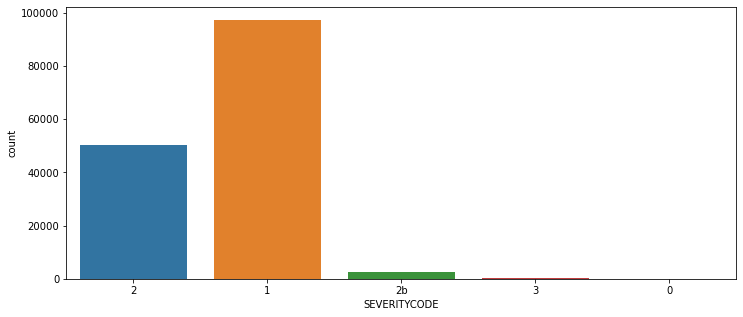

,SEVERITYCODE
1,97269
2,50283
2b,2483
3,245
0,2


In [91]:
#Checking if the data is balanced
plt.figure(figsize=(12, 5))
sns.countplot(x="SEVERITYCODE", data=collisions)
plt.show()
collisions['SEVERITYCODE'].value_counts().to_frame()

As we can see, there are twice as much "Property Damage Only Collision" data as "Injury Collision" data.  
The others types of severities won't help us because of too few records. We wil have to remove they.  
This situation could caused a bias in the data results. So, we will need to equalize this data.

In [93]:
#Removing the types 'Serious Injury Collision' and 'Fatality Collision' from the dataframe
collisions = collisions.drop(collisions[(collisions['SEVERITYCODE'] == "2b") |
                                        (collisions['SEVERITYCODE'] == "3") |
                                        (collisions['SEVERITYCODE'] == "0")
                                       ].index)
collisions['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,97269
2,50283


In [54]:
#You should have to install the Imballanced library before balance the data.
!pip install -U imbalanced-learn

     |████████████████████████████████| 167 kB 4.5 MB/s eta 0:00:01


1    50283
2    50283
Name: SEVERITYCODE, dtype: int64

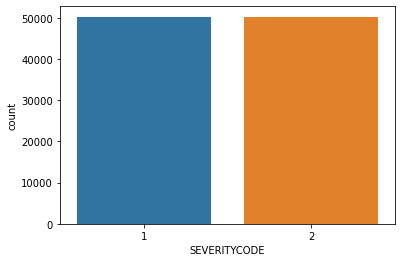

In [95]:
from imblearn.under_sampling import RandomUnderSampler

X = collisions[['ADDRTYPE','LOCATION','COLLISIONTYPE','JUNCTIONTYPE',
                'WEATHER','ROADCOND','LIGHTCOND']]
y = collisions[['SEVERITYCODE']]

rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X,y)

collisions = X_res
collisions['SEVERITYCODE'] = y_res

sns.countplot(x="SEVERITYCODE", data=collisions)
collisions['SEVERITYCODE'].value_counts()

Now the data is balanced and we can continue to the next step.

## 4 - Analysis <a name="analysis"></a>

In [ ]:
# [WORKING IN PROGRESS]
# perform some basic explanatory data analysis and derive some additional info from our raw data.

As we have already made some changes to the data set (we exclude bad records and balance the data), this analysis will not focus on making a complex understanding of the data.  
The purpose of this analysis is to identify the attributes that contribute to a satisfactory machine learning algorithm.

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="severity", data=colData, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="severity", data=colData, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=colData, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="severity", data=colData, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="severity", data=colData, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="severity", data=colData, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="severity", data=colData, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="severity", data=colData, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="severity", data=colData, ax=axs[2, 2])


sns.countplot(x="SEVERITYDESC", data=collisions)


X = collisions[['X','Y','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT',
                'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE',
                'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
y = collisions[['SEVERITYCODE']]

#### Analysing the attribute ADDRTYPE:

In [ ]:
sns.countplot(y="ADDRTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
df_grouped_addrtype = collisions.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts().to_frame(name='TOTAL')
df_grouped_addrtype

There are almost twice accidents with property damage on blocks than intersections.  
The number of accidents with injury collision are similar for these two types of address type.

In [ ]:
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="UNDERINFL", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="WEATHER", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="ROADCOND", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

In [ ]:
sns.countplot(y="", hue="SEVERITYDESC", data=collisions)

## 5 - Results and Discussion <a name="results"></a>

In [ ]:
# [WORKING IN PROGRESS]
# Results -> section where you discuss the results.
# Discussion -> section where you discuss any observations you noted and any recommendations you can make based on the results.

## 6 - Conclusion <a name="final"></a>

In [ ]:
# [WORKING IN PROGRESS]
# section where you conclude the report